# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [26]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [32]:
#a = 0.05
t, p_value = stats.ttest_ind(A, B)

if p_value < 0.05:
    print('Отклонить Н0')
else:
    print('Не отклонять Н0')

Не отвергаем нулевую гипотезу, различий в препаратах нет


In [33]:
print(t)
print(p_value)

-1.733800647210997
0.08451003973499756


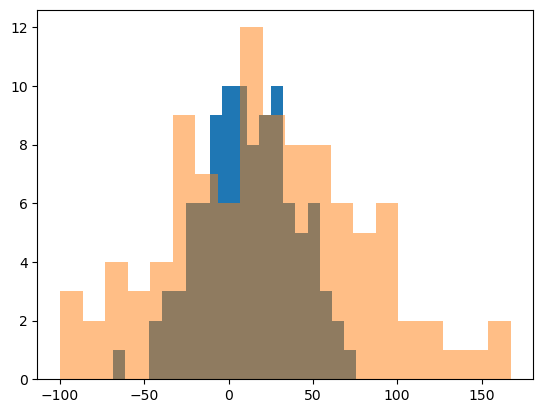

In [41]:
plt.hist(A, bins=20);
plt.hist(B, bins=20, alpha=0.5);

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [42]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [43]:
а, p_value = stats.f_oneway(water, nutri, mineral)
a = 0.05 
print(а, p_value)

if p_value > 0.05:
    print('Отклонить Н0')
else:
    print('Не отклонять Н0')

12.525963044834192 2.9240047906326866e-05
Не отвергаем нулевую гипотезу, распределение разное


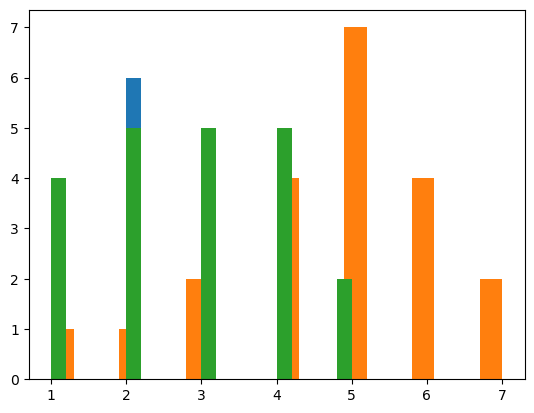

In [48]:
plt.hist(water, bins=20);
plt.hist(nutri, bins=20);
plt.hist(mineral, bins=20);

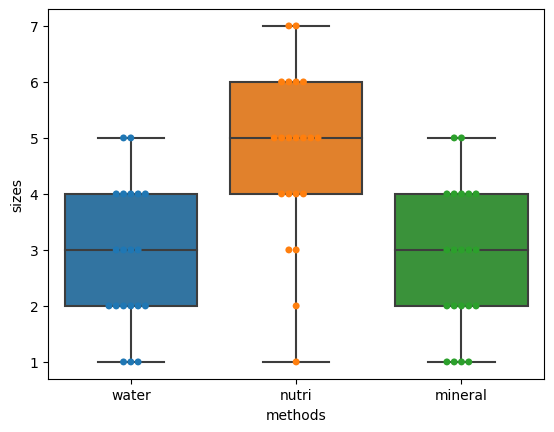

In [46]:
sizes = water + nutri +mineral
methods = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['methods'] = methods

ax = sns.boxplot(x='methods', y='sizes', data=df_mid)
ax = sns.swarmplot(x="methods", y="sizes", data=df_mid)
plt.show()

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [50]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)
data.head()

C:\Users\shali\AppData\Local\Temp\ipykernel_7540\4000378242.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [51]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Версия gate_30 имеет более высокие показатели.

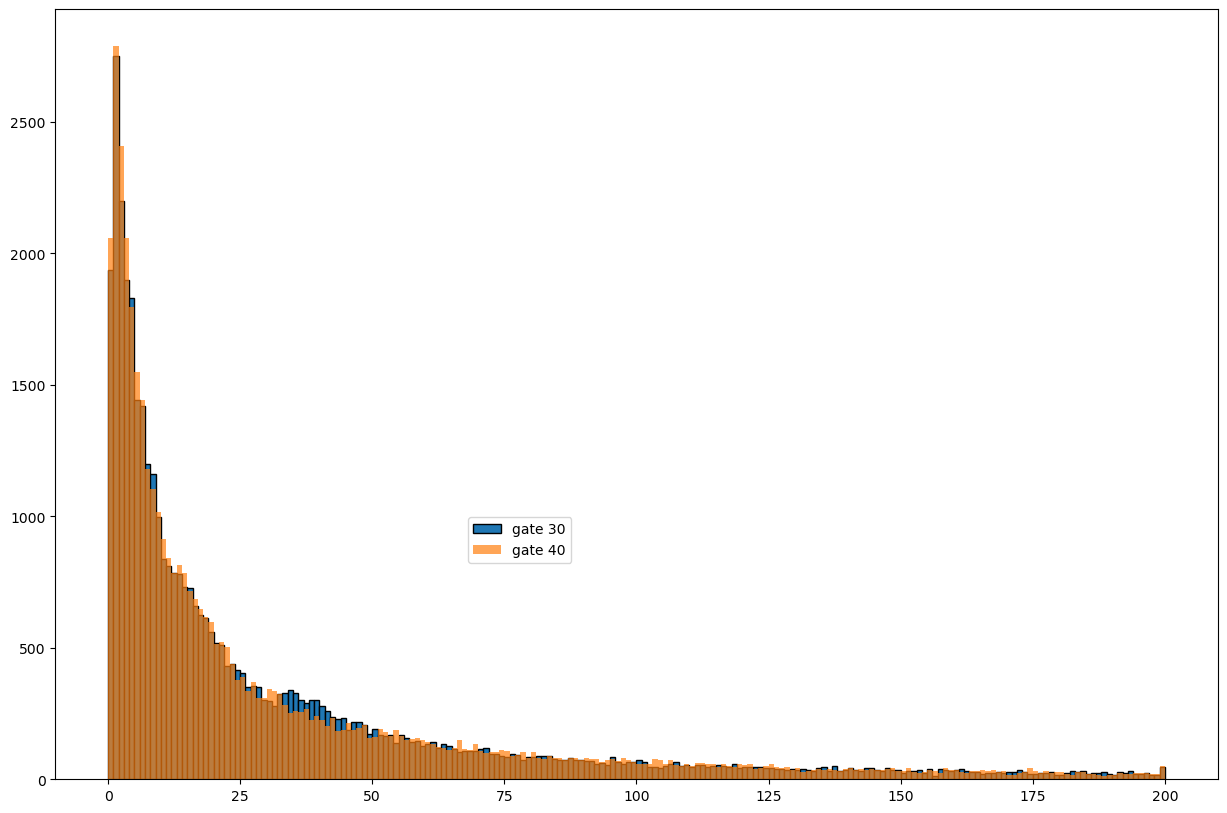

In [52]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Есть участок отличия у gate_30 в сранении с gate_40, в сторону увеличения количества пройденных раундов.

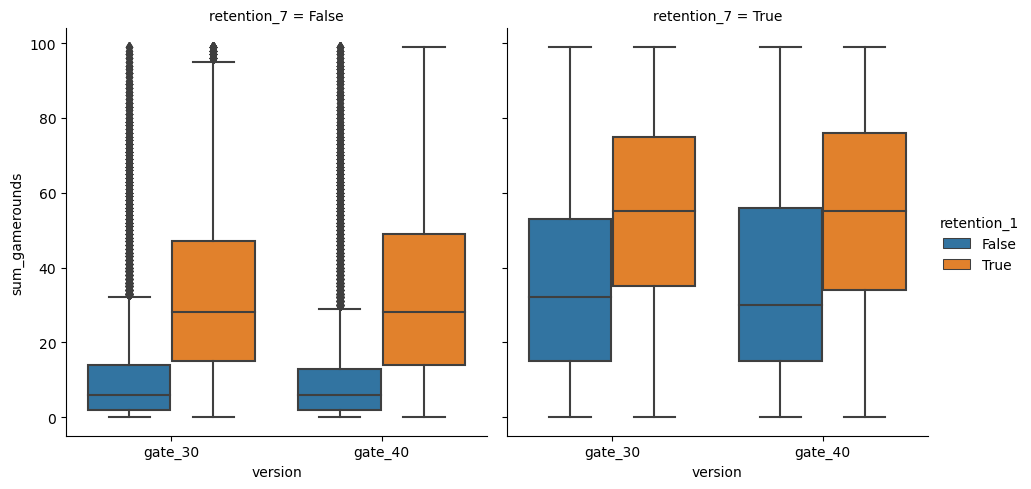

In [53]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

<Figure size 1500x1000 with 0 Axes>

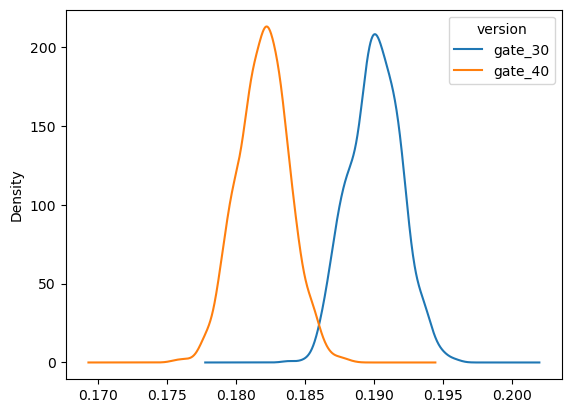

In [56]:
plt.figure(figsize=(15, 10));

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density');

In [254]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p

(0.7939569526814368, 0.3729086824696095)

In [256]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = mannwhitneyu(data[data['version'] == 'gate_40']['sum_gamerounds'], data[data['version'] == 'gate_30']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1024331250.500, p=0.050
Statistics=1009027049.500, p=0.050


Эффект от переноса ворот есть, он не случайный.

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [67]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

C:\Users\shali\AppData\Local\Temp\ipykernel_7540\3643672622.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [189]:
grass_rock = pokemon.loc[((pokemon['Class 1'] == 'Grass') | (pokemon['Class 1'] == 'Rock')) & (pokemon['Class 2'].isna())]
grass_rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
122,123,Tangela,Grass,NaN,65,55,115,100,40,60,False
166,167,Chikorita,Grass,NaN,45,49,65,49,65,45,False
167,168,Bayleef,Grass,NaN,60,62,80,63,80,60,False
168,169,Meganium,Grass,NaN,80,82,100,83,100,80,False
197,198,Bellossom,Grass,NaN,75,80,95,90,100,50,False


<AxesSubplot:xlabel='Class 1', ylabel='Attack'>

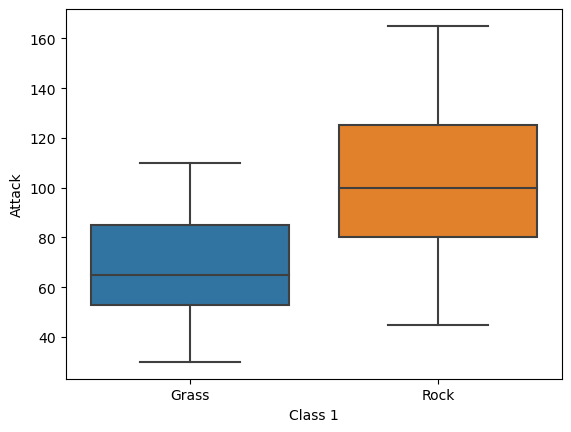

In [190]:
sns.boxplot(x='Class 1', y='Attack', data=grass_rock)

На графике видно, что средняя сила атаки у покемонов класса rock выше.

In [215]:
stats.ttest_ind(Grass['Attack'], Rock['Attack'])
a = 0.05

if p_value < a:
    print('Отклонить Н0, средняя сила атаки у классов разная')
else:
    print('Не отклонять Н0')

Отклонить Н0, средняя сила атаки у классов разная


In [201]:
a = int(Grass['Attack'].mean())
b = int(Rock['Attack'].mean())
print(a)
print(b)

68
103


Средняя сила атаки у класса Rock выше

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [193]:
water_normal= pokemon.loc[((pokemon['Class 1'] == 'Water') | (pokemon['Class 1'] == 'Normal')) & (pokemon['Class 2'].isna())]
water_normal.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


<AxesSubplot:xlabel='Class 1', ylabel='Speed'>

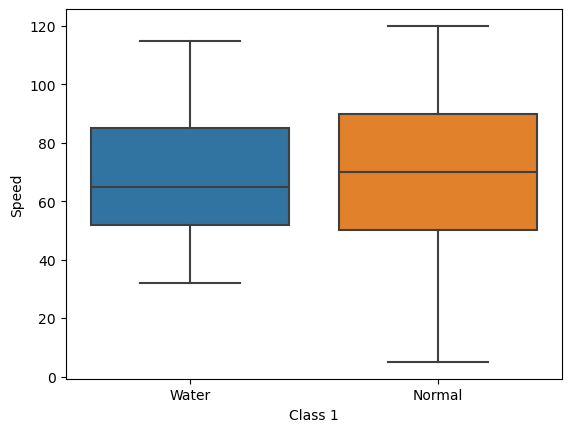

In [194]:
sns.boxplot(x='Class 1', y='Speed', data=water_normal)

Что-либо весомое сказать по графику затруднительно

In [227]:
result = stats.ttest_ind(Water['Speed'], Normal['Speed'])
a = 0.05

if (result.pvalue < a):
    print('Отклонить Н0')
else:
    print('Не отклонять Н0, средняя скорость классов одинаковая')

Не отклонять Н0, средняя скорость классов одинаковая


**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [77]:
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [228]:
df_treathed_pokemon = pokemon[pokemon.Name.isin(treathed_pokemon)]
df_treathed_pokemon 

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


<AxesSubplot:xlabel='Name', ylabel='Speed'>

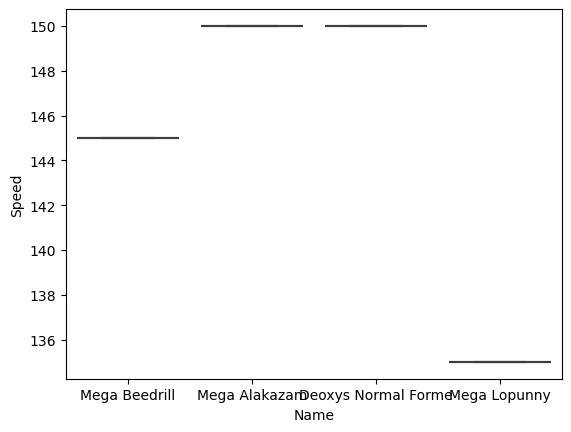

In [223]:
sns.boxplot(x='Name', y='Speed', data=df_treathed_pokemon)

In [224]:
drop_df_treathed_pokemon = pd.concat([pokemon, df_treathed_pokemon]).drop_duplicates(keep=False)

<AxesSubplot:ylabel='Speed'>

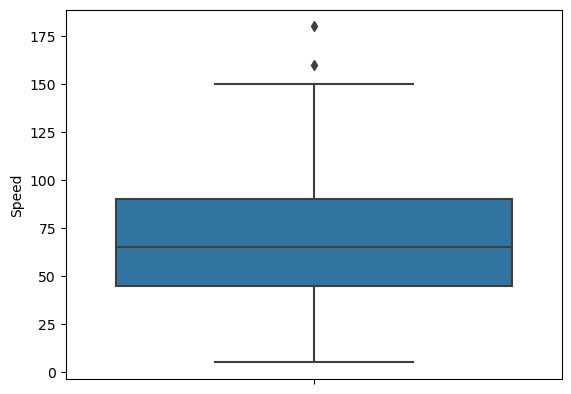

In [226]:
sns.boxplot(y='Speed', data=drop_df_treathed_pokemon)

Показатели скорости покемонов из списка treated_pokemons выше средних значений из списка и находятся между 3-м квартилем и максимумом

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [248]:
df_pokemon = pokemon[(pokemon['Legendary'] == True)][['HP','Attack','Defense']]
df_pokemon['Sum'] = df_pokemon['HP'] + df_pokemon['Attack'] + df_pokemon['Defense']
df_pokemon['Prod'] = df_pokemon['HP'] * df_pokemon['Attack'] * df_pokemon['Defense']
df_pokemon.head()

,HP,Attack,Defense,Sum,Prod
156,90,85,100,275,765000
157,90,90,85,265,688500
158,90,100,90,280,810000
162,106,110,90,306,1049400
163,106,190,100,396,2014000


In [249]:
df2_pokemon = pokemon[(pokemon['Legendary'] == False)][['HP','Attack','Defense']]
df2_pokemon['Sum'] = df2_pokemon['HP'] + df2_pokemon['Attack'] + df2_pokemon['Defense']
df2_pokemon['Prod'] = df2_pokemon['HP'] * df2_pokemon['Attack'] * df2_pokemon['Defense']
df2_pokemon.head()

,HP,Attack,Defense,Sum,Prod
0,45,49,49,143,108045
1,60,62,63,185,234360
2,80,82,83,245,544480
3,80,100,123,303,984000
4,39,52,43,134,87204


C:\Users\shali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sum'>

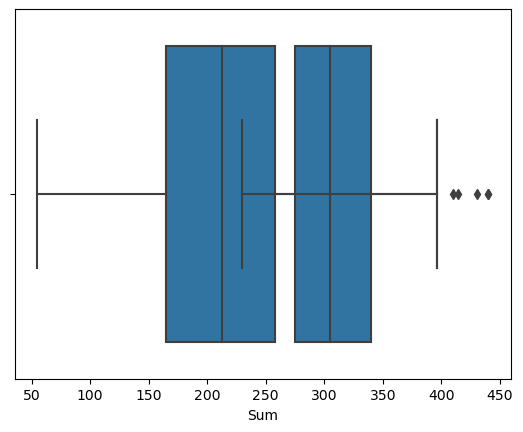

In [253]:
sns.boxplot(df2_pokemon['Sum'])
sns.boxplot(df_pokemon['Sum'])

Cумма и произведение характеристик HP, Attack, Defense у легендарных покемонов находится между 3 квартилем и максимумом, а значит их характеристики выше.

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [229]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [230]:
best_defence = pokemon[(pokemon['Class 2'].isin(best_defence_class)) | (pokemon['Class 1'].isin(best_defence_class))][['Class 1','Class 2','Defense']]
best_defence.head()

,Class 1,Class 2,Defense
32,Ground,NaN,85
33,Ground,NaN,110
36,Poison,Ground,87
39,Poison,Ground,77
55,Ground,NaN,25


In [231]:
best_defence['Class'] = np.where(best_defence['Class 1'].isin(best_defence_class), best_defence['Class 1'], best_defence['Class 2'])
best_defence.head()

,Class 1,Class 2,Defense,Class
32,Ground,NaN,85,Ground
33,Ground,NaN,110,Ground
36,Poison,Ground,87,Ground
39,Poison,Ground,77,Ground
55,Ground,NaN,25,Ground


<AxesSubplot:xlabel='Class', ylabel='Defense'>

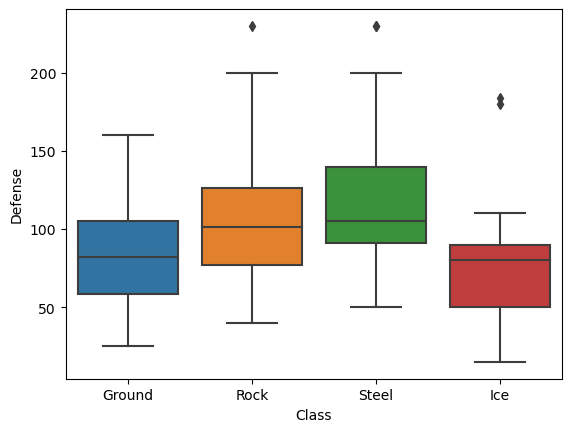

In [237]:
sns.boxplot(x="Class", y="Defense", data=best_defence)

In [236]:
f, p = stats.f_oneway(best_defence[best_defence['Class'] == 'Rock']['Defense'], best_defence[best_defence['Class'] == 'Ground']['Defense'], best_defence[best_defence['Class'] == 'Steel']['Defense'], best_defence[best_defence['Class'] == 'Ice']['Defense'])  # дисперсионный анализ (ДА) в python
a = 0.05

if p < a:
    print('Отклонить Н0')
else:
    print('Не отклоняем H0, классы не различаются')

Отклонить Н0


![](scipy.png)